In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import statsmodels.api as sm
from statsmodels.formula.api import ols
from bioinfokit.analys import stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# QQ Plot Each Voltage STD Based

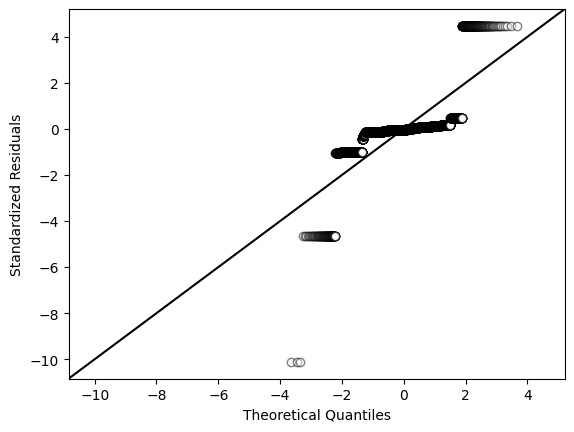

In [22]:
df_each_std = pd.read_csv('../docs 2nd Approach/remove_outlier_each_std.csv')
df_each_std['z-score'] = (df_each_std['value'] - df_each_std['value'].mean()) / df_each_std['value'].std()
res = stat()
res.tukey_hsd(df=df_each_std, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on each sample STD.png')
plt.show()

In [23]:
OLS_each_std = ols('value ~ voltage', data = df_each_std).fit()
ANOVA_each_std = sm.stats.anova_lm(OLS_each_std)
ANOVA_each_std

,df,sum_sq,mean_sq,F,PR(>F)
voltage,8.0,1202.332146,150.291518,124.785818,3.653350e-197
Residual,7551.0,9094.392908,1.204396,NaN,NaN


# QQ Plot Based Whole Population

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


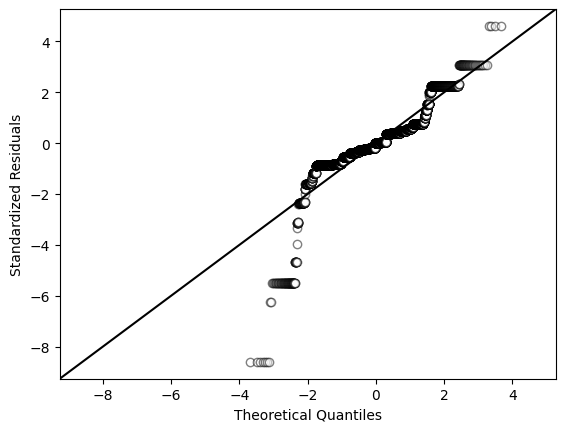

In [24]:
df_whole_std = pd.read_csv('../docs 2nd Approach/remove_outlier_whole_std.csv')
res = stat()
res.tukey_hsd(df=df_whole_std, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on Whole STD.png')
plt.show()

In [25]:
OLS_whole_std = ols('value ~ voltage', data = df_whole_std).fit()
ANOVA_whole_std = sm.stats.anova_lm(OLS_whole_std) 
ANOVA_whole_std  

,df,sum_sq,mean_sq,F,PR(>F)
voltage,8.0,583.903648,72.987956,1576.589144,0.0
Residual,8478.0,392.487728,0.046295,NaN,NaN


# QQ Plot Chauvenet

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


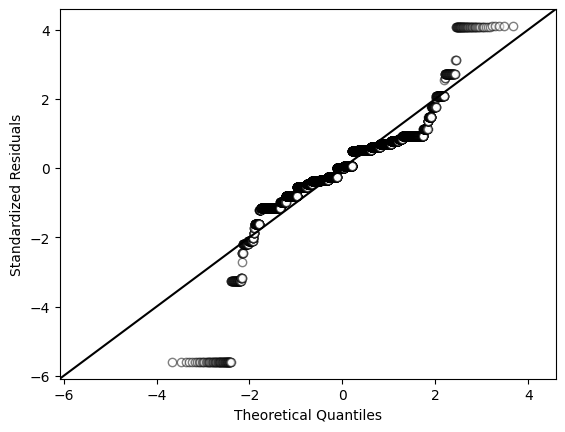

In [26]:
df_chauvenet = pd.read_csv('../docs 2nd Approach/remove_outlier_chauvenet.csv')
df_chauvenet['z-score'] = (df_chauvenet['value'] - df_chauvenet['value'].mean()) / df_chauvenet['value'].std()
res = stat()
res.tukey_hsd(df=df_chauvenet, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on Chauvenet.png')
plt.show()

In [27]:
OLS_chauvenet = ols('value ~ voltage', data = df_chauvenet).fit()
ANOVA_chauvenet = sm.stats.anova_lm(OLS_chauvenet)
ANOVA_chauvenet

,df,sum_sq,mean_sq,F,PR(>F)
voltage,8.0,157.663374,19.707922,782.09694,0.0
Residual,8057.0,203.026911,0.025199,NaN,NaN


In [28]:
df_chauvenet = df_chauvenet.sort_values(by=['value'])

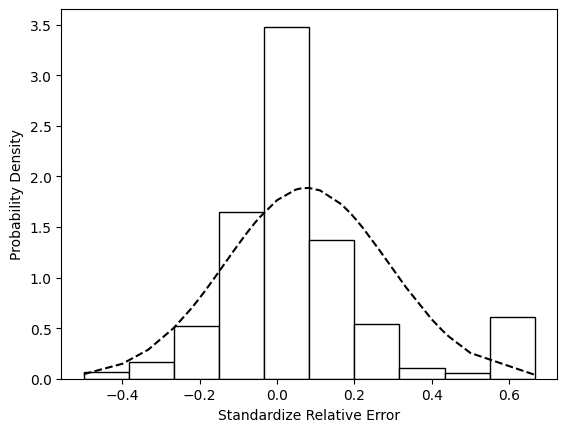

In [29]:

plt.plot(df_chauvenet['value'], stats.norm.pdf(df_chauvenet['value'], df_chauvenet['value'].mean(), df_chauvenet['value'].std()), color='k', linestyle='--')
plt.hist(df_chauvenet['value'], density=True, edgecolor='k', color='w', bins=10)
plt.xlabel('Standardize Relative Error')
plt.ylabel('Probability Density')
plt.savefig('../docs 2nd Approach/img/distribution_normal_remove_chauvenet.png')

# Chauvenet Without 3v, 6v and 9v

In [30]:
df_chauvenet = pd.read_csv('../docs 2nd Approach/remove_outlier_chauvenet.csv')
df_chauvenet

,index,voltage,value
0,124,0.5v,0.000000
1,125,0.5v,0.000000
2,126,0.5v,0.000000
3,127,0.5v,0.000000
4,128,0.5v,0.000000
...,...,...,...
8061,8995,24.5v,0.285714
8062,8996,24.5v,0.285714
8063,8997,24.5v,0.285714
8064,8998,24.5v,0.285714


g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


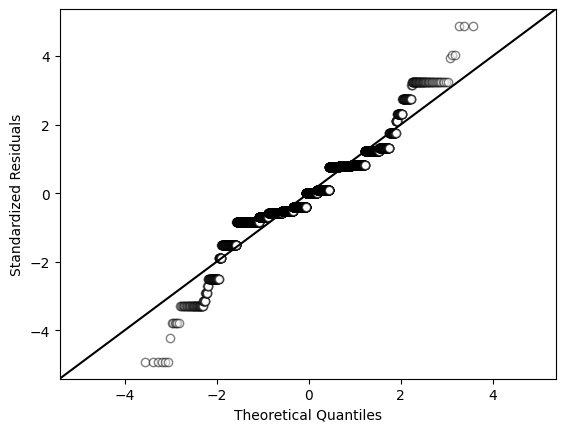

,index,voltage,value
0,124,0.5v,0.000000
1,125,0.5v,0.000000
2,126,0.5v,0.000000
3,127,0.5v,0.000000
4,128,0.5v,0.000000
...,...,...,...
5505,8995,24.5v,0.285714
5506,8996,24.5v,0.285714
5507,8997,24.5v,0.285714
5508,8998,24.5v,0.285714


In [31]:
df_chauvenet = pd.read_csv('../docs 2nd Approach/remove_outlier_chauvenet.csv')
df_chauvenet = df_chauvenet[
    (df_chauvenet['voltage'] != '6v') &
    (df_chauvenet['voltage'] != '3v') &
    (df_chauvenet['voltage'] != '9v') 
    ].reset_index(drop=True)
res = stat()
res.tukey_hsd(df=df_chauvenet, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on Chauvenet.png')
plt.show()
df_chauvenet

# 

# Chauvenet and Std in each voltage

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


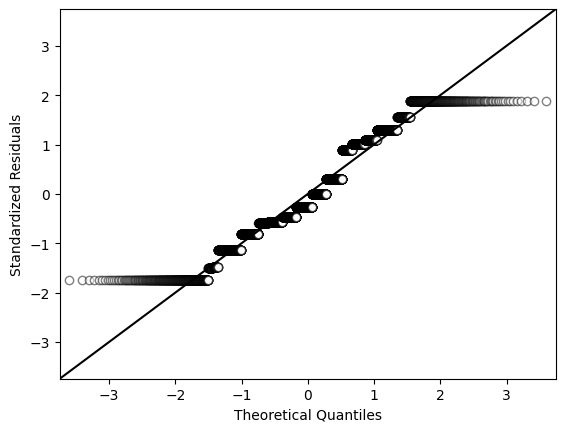

In [32]:
df_chauvenet_each_std = pd.read_csv('../docs 2nd Approach/remove_outlier_Chauvenet + each std.csv')
res = stat()
res.tukey_hsd(df=df_chauvenet_each_std, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on Chauvenet and Each Std.png')
plt.show()


# Chauvenet and Std in Whole voltage

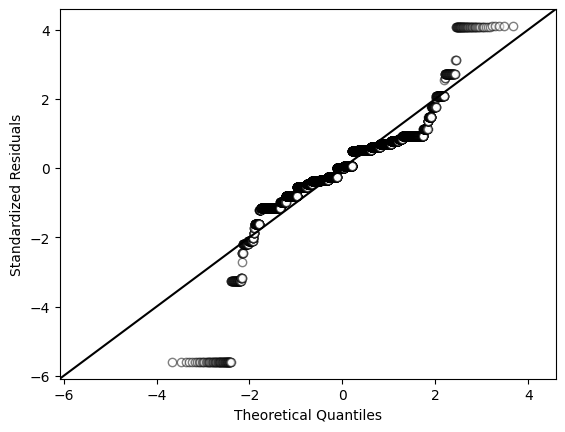

In [33]:
df_chauvenet_whole_std = pd.read_csv('../docs 2nd Approach/remove_outlier_Chauvenet + whole std.csv')
res = stat()
res.tukey_hsd(df=df_chauvenet_whole_std, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.savefig('../docs 2nd Approach/img/QQ Plot Remove Outlier based on Chauvenet and Each Std.png')
plt.show()


# Each Chauvenet

g:\Program\Python\__env\Yolo2TFLite\lib\site-packages\bioinfokit\analys.py:402: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  mult_group[ele] = df[df[xfac_var] == ele].mean().loc[res_var]


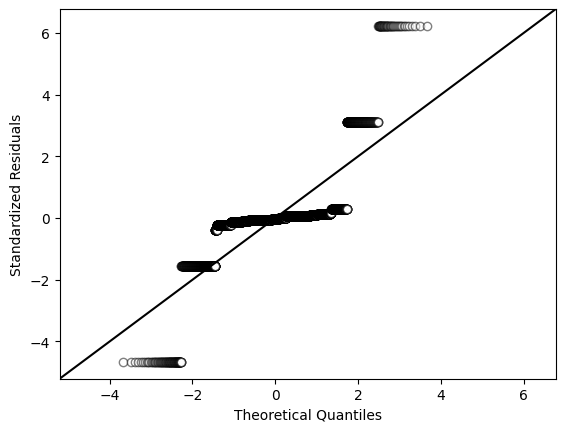

In [37]:
df_chauvenet_each = pd.read_csv('../docs 2nd Approach/remove_outlier_each_chauvenet.csv')
res = stat()
res.tukey_hsd(df=df_chauvenet_each, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()


# Double Chauvenet

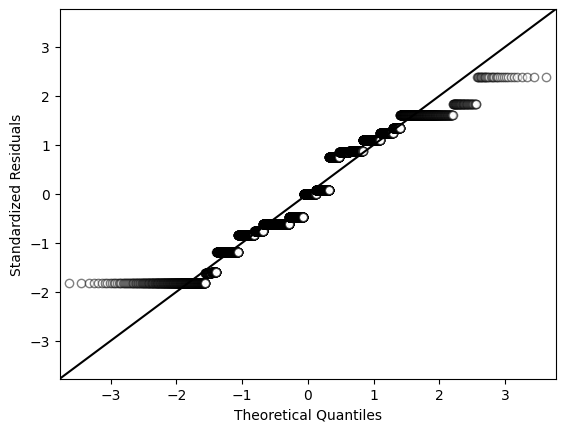

In [38]:
df_chauvenet_double = pd.read_csv('../docs 2nd Approach/remove_outlier_double_chauvenet.csv')
res = stat()
res.tukey_hsd(df=df_chauvenet_double, res_var='value', xfac_var='voltage', anova_model='value ~ C(voltage)')
pp = sm.ProbPlot(res.anova_std_residuals, fit=True)
qq = pp.qqplot(marker='o', markerfacecolor='w', markeredgecolor='k', alpha=0.5)
sm.qqline(qq.axes[0], line='45', fmt='k--')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
